## Preliminaries

### Simple Distribution + Complex Distribution = Complex Distribution

Changing a simple distribution to a complex distribution through a deterministic transformation. An example of a simple distribution is the **Gaussian distribution**. 

Let us understand the Gaussian distribution. Suppose that you have a Gum Ball Machine in which the balls pass through the pins and fall in differnet bins in a beaker. The process is depicted in the figure below.

<img src="images/gumAfter.png"
     alt="The head and torso of a dinosaur skeleton;
          it has a large head with long sharp teeth"
     width="400"
     height="341">

As the ball comes in contact with pins, they have a probability of $\frac{1}{2}$ to go either left or right. Now, assume that we toss a million gum balls from top to bottom. If we count the number of balls in each of the bottom bins, we will find that the bins in the middle would have the largest number of gumballs. This is because at every level of pins, a gumball has more ways to "bin into" the middle bins. As an example, note that if the ball moves left hand side after colliding with the first pin, it can never "bin into" the rightmost bin but it can always find a way to drop into the middle bins. We can say that a drop at each level of pins minimizes or nullifies the possibility of gumballs landing into the extreme bins.

<img src="images/gumBefore.png"
     alt="The head and torso of a dinosaur skeleton;
          it has a large head with long sharp teeth"
     width="400"
     height="341">  
     
Through the above example, we have created a Gaussian distribution whose support is characterised by discrete bins containing gumballs. In general, the support is defined as continues. It means that each point has a certain probability associated with it. This is well observed while playing darts. Analytically, we can write the Gaussian distribution in terms of **two parameters**, the mean $\mu$ and variance $\sigma$ as follows :-

$$ f(x | \mu,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

### Can we model any other distribution using the Gaussian ?

In [146]:
##########################
# Import necessary modules
##########################

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let us consider a C-shaped distribution. Can we model this distribution with samples from a Gaussian distribution ?

<img src="images/c_dist.png"
     alt="The head and torso of a dinosaur skeleton;
          it has a large head with long sharp teeth"
     width="400"
     height="341">

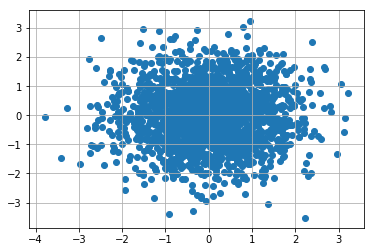

In [147]:
###############################
# Simple Distribution: Gaussian
###############################

numSamples = 2000;

z = np.random.randn(numSamples,2)               # Sample from Gaussian distribution

z1 = z[:,0]
z2 = z[:,1]

plt.scatter(z1,z2)
plt.hold()
plt.grid(True)
plt.show()

#### The "C" distribution

Now, we should apply some deterministic function to the samples produced by the Gaussian above so that it looks like a C-shaped distribution

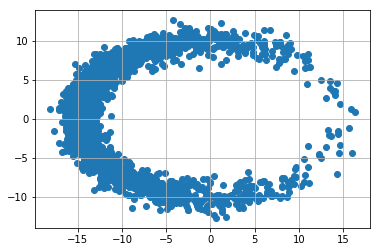

In [153]:
############################################
# Deterministically transforming the samples
############################################

os = 10
ost = np.pi/2

x1 = -(1.5*os+z1)*(np.sin(z2+ost))
x2 = (os+z1)*np.cos(z2+ost)

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)
plt.show()

#### The "PYCON" distribution


Similarly, consider another transformation, let's say we wish to obtain even more complex distribution, the "PYCON" distribution. Let's try to formulate it from two Gaussians and a multimodal distribution. Let the input be ($s_{1}, s_{2}, s_{3}$) where $s_{1}$ and $s_{2}$ are sampled from a 2-dimensional Gaussian distribution with mean of 0 and standard deviation of 1 and $s_{3}$ is sampled from a 5-state multinomial distribution. Let's apply an appropriate transform to this and obtain the following distribution

<img src="images/pycon_dist.png", width="300", align=”left”>

* exmplain the multinomial distribution

In [154]:
#########################################
# Deterministic transformation for 'PYCON'
#########################################

# A not-so-elegant deterministic transformation

def transformation_pycon(z12,z3):

    os = 10
    ost = np.pi/2
    
    x = np.zeros((len(z3),2))

    for i in range(len(z3)):

        z1 = z12[i,0]
        z2 = z12[i,1]

        idx = z3[i]

        if idx==0:
            # Y_Vertical
            x2 = (10+z1)*np.cos(z2+ost)-20
            x1 = 40+(1+z1)*(np.sin(z2+ost))
        elif idx==1:
            # Y_V
            x1 = 40+(os+z1)*np.cos(z2+ost)
            x2 = 12-0.6*(4*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==2:
            # C
            x2 = 2*(os+z1)*np.cos(z2+ost)-10
            x1 = 70-(1.5*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==3:
            # N_left
            x2 = 2*(10+z1)*np.cos(z2+ost)-10
            x1 = 110+(1+z1)*(np.sin(z2+ost))
        elif idx==4:
            # N_right
            x2 = 2*(10+z1)*np.cos(z2+ost)-10
            x1 = 150+(1+z1)*(np.sin(z2+ost))            
        elif idx==5:
            # O_left
            x2 = 2.0*(os+z1)*np.cos(z2+ost)-10
            x1 = 90-(os+z1)*(np.sin(z2+ost))
        elif idx==6:
            # O_right
            x2 = 2.0*(os+z1)*np.cos(z2+ost)-10
            x1 = 90+(os+z1)*(np.sin(z2+ost))
        elif idx==7:
            # P_vertical
            x2 = 2*(10+z1)*np.cos(z2+ost)-10
            x1 = (1+z1)*(np.sin(z2+ost))     
        elif idx==8:
            # N_slant
            x1 = 110+40*np.abs(np.sin(z2+ost))
            x2 = 120-x1
        elif idx==9:
            # Y_V
            x2 = (os+z1)*np.cos(z2+ost)
            x1 = 0.4*(4*os+z1)*np.abs(np.sin(z2+ost))
        x[i,0] = x1
        x[i,1] = x2
        
    return x

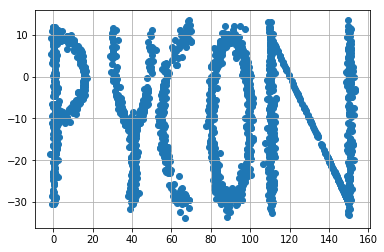

In [155]:
#################################################################################################
# Transform samples from Gaussian and Multinomial distribution to that of the 'CVIT' distribution
#################################################################################################

numSamples = 2000

z12 = np.random.randn(numSamples,2)                  # Sample [z1,z2] from Gaussian distribution
z3 = np.random.randint(10,size=(numSamples,1))     # Sample [z3] from Multinomial distribution

x = transformation_pycon(z12,z3)                      # Apply deterministic transformation

x1 = x[:,0];
x2 = x[:,1];

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)

plt.show()


In this exercise, we set the deterministic transformations ourselves, we can well leverage the power of deep neural networks to model these complicated transformations. Though we need to provide the samples from target distribution, the deep network would learn the appropriate transformation while training. Generative models such as <a href="https://arxiv.org/abs/1406.2661"> Generative Adversarial Networks</a> and  <a href="https://arxiv.org/abs/1312.6114"> Variational Auto-encoders </a> use neural networks to model complex pprobability density functions albeit both use different criterian for training the network. 

<img src="images/transformation_1.png", width="900", align=”left”>
